In [1]:
import pandas as pd
import seaborn as sns

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [3]:
from sklearn.preprocessing import RobustScaler

In [4]:
# seaborn 한글 안깨지게
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

In [5]:
elderly_life=pd.read_csv("노인생활인구_최종.csv",encoding="cp949")
elderly_build=pd.read_csv("노인시설수_최종.csv",encoding="cp949")
market=pd.read_csv("행정동별_유통업체_노인.csv",encoding="cp949")
hospital=pd.read_csv("의료기관수_노인.csv",encoding="cp949")

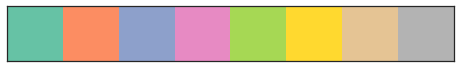

In [6]:
# seaborn palette -> 찾아보고 마음에 드는걸로 바꿔도 괜찮 !
palette = sns.color_palette('Set2') # palette 이름 () 안에 넣어주고
sns.palplot(palette) # 색상 확인
sns.set_palette('Set2') # 기본 palette로 적용됨

# 노인생활인구~ 노인시설수 cluster

In [29]:
df=pd.merge(elderly_life,elderly_build,on="행정동")
df

,행정동,전체평균,노인관련시설수
0,가락1동,6173,0
1,가락2동,5619,0
2,가락본동,7463,6
3,가리봉동,2121,0
4,가산동,6771,4
...,...,...,...
417,효창동,2089,0
418,후암동,2825,1
419,휘경1동,3352,1
420,휘경2동,3962,5


In [30]:
# 노인관련시설수 0인 행정동 제거 (df_acc)
df_acc = df.drop(index = df[df['노인관련시설수']==0].index)
df_acc = df_acc.reset_index(drop=True)
df_acc

,행정동,전체평균,노인관련시설수
0,가락본동,7463,6
1,가산동,6771,4
2,가양1동,7093,3
3,가양2동,5035,1
4,갈현1동,6081,3
...,...,...,...
302,화양동,4492,5
303,후암동,2825,1
304,휘경1동,3352,1
305,휘경2동,3962,5


In [31]:
# scaling
scaler = RobustScaler()
df_scale=pd.DataFrame(scaler.fit_transform(df_acc[['전체평균','노인관련시설수']]),columns=df_acc[['전체평균','노인관련시설수']].columns)
df_scale.insert(0, '행정동',df['행정동'])
df_scale

,행정동,전체평균,노인관련시설수
0,가락1동,0.891371,0.6
1,가락2동,0.642046,0.2
2,가락본동,0.758062,0.0
3,가리봉동,0.016574,-0.4
4,가산동,0.393443,0.0
...,...,...,...
302,월계2동,-0.179067,0.4
303,월계3동,-0.779679,-0.4
304,월곡1동,-0.589804,-0.4
305,월곡2동,-0.370023,0.4


C:\Users\gtsye\anaconda3\envs\dongguk\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  "KMeans is known to have a memory leak on Windows "


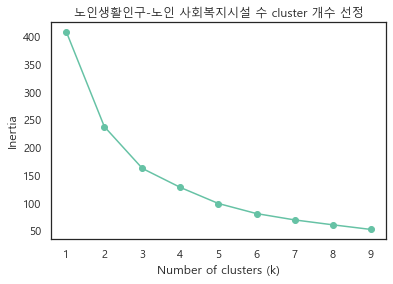

In [32]:
data = df_scale.values
X=data[:,1:] # 행정동명 제외
num_clusters = list(range(1,10))
inertias = []

# elbow
for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(X)
    inertias.append(model.inertia_)

plt.title('노인생활인구-노인 사회복지시설 수 cluster 개수 선정')
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

k = 4

Text(0.5, 1.0, '노인 생활인구와 서울시내 노인 관련 사회복지시설수 clustering')

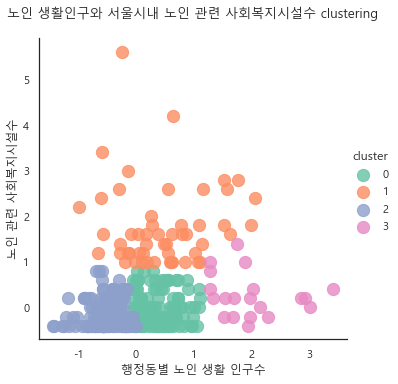

In [33]:
# clustering
kmeans = KMeans(n_clusters=4).fit(X)
kmeans.cluster_centers_
kmeans.labels_
df_scale['cluster'] = kmeans.labels_

sns.lmplot(x = '전체평균',y = '노인관련시설수', data = df_scale, fit_reg=False, scatter_kws={"s":150},hue="cluster")
plt.xlabel('행정동별 노인 생활 인구수')
plt.ylabel('노인 관련 사회복지시설수')
plt.title('노인 생활인구와 서울시내 노인 관련 사회복지시설수 clustering', fontsize = 13, pad = 20) # pad : 제목과 그림 사이 간격

cluster 선정 애매함 -> filtering

In [19]:
df_acc_scale_0 = df_scale[df_scale['전체평균']>=0]
df_acc_scale_0

,행정동,전체평균,노인관련시설수,cluster
0,가락1동,0.891371,0.6,1
1,가락2동,0.642046,0.2,1
2,가락본동,0.758062,0.0,1
3,가리봉동,0.016574,-0.4,1
4,가산동,0.393443,0.0,1
...,...,...,...,...
294,용문동,0.504774,0.6,1
297,우이동,2.071338,2.4,0
300,원효로2동,0.530355,-0.2,1
301,월계1동,0.314538,1.0,0


C:\Users\gtsye\anaconda3\envs\dongguk\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


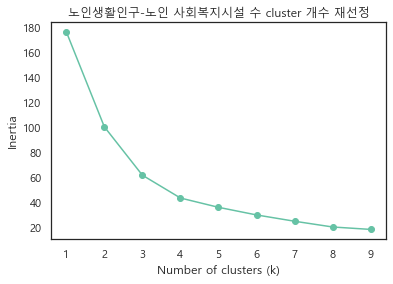

In [20]:
# elbow
data = df_acc_scale_0.values
X=data[:,1:-1]

num_clusters = list(range(1,10))
inertias = []

for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(X)
    inertias.append(model.inertia_)

plt.title('노인생활인구-노인 사회복지시설 수 cluster 개수 재선정')
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

k = 4

C:\Users\gtsye\anaconda3\envs\dongguk\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0.5, 1.0, '노인 생활인구와 서울시내 노인 관련 사회복지시설수 2차 clustering')

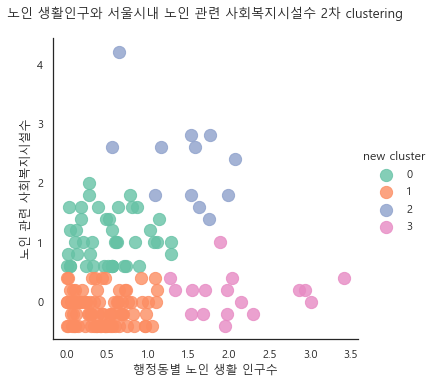

In [23]:
# clustering
kmeans = KMeans(n_clusters=4).fit(X)
kmeans.cluster_centers_
kmeans.labels_
df_acc_scale_0['new cluster'] = kmeans.labels_

sns.lmplot(x='전체평균',y='노인관련시설수', data = df_acc_scale_0, fit_reg=False, scatter_kws={"s":150},hue="new cluster")
plt.xlabel('행정동별 노인 생활 인구수')
plt.ylabel('노인 관련 사회복지시설수')
plt.title('노인 생활인구와 서울시내 노인 관련 사회복지시설수 2차 clustering', fontsize = 13, pad = 20) # pad : 제목과 그림 사이 간격

Cluster 0 + Cluster 2 (노인 관련 사회복지시설이 어느정도 존재)

In [27]:
result = df_acc_scale_0[(df_acc_scale_0['new cluster'] == 2) | (df_acc_scale_0['new cluster'] == 0)]
result

,행정동,전체평균,노인관련시설수,cluster,new cluster
0,가락1동,0.891371,0.6,1,0
17,개포4동,0.847775,1.0,0,0
18,거여1동,1.761124,2.8,0,2
19,거여2동,1.111872,1.0,2,0
27,공항동,0.327869,0.6,1,0
30,교남동,0.243199,0.6,1,0
44,길동,1.165916,2.6,0,2
50,남가좌1동,0.180868,1.4,0,0
55,노량진1동,1.022158,1.2,0,0
63,답십리2동,0.293641,0.8,1,0


In [28]:
result.to_csv("노인생활인구_시설수_clustering.csv",encoding="cp949")